In [ ]:
#                                      LOGISTIC REGRESSION

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

# Load dataset
heart_data = pd.read_csv("heart.csv")

# Split features and target
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

# Hyperparameter tuning
C_values = [0.1, 1, 10, 100]  # Different values of C for Logistic Regression
best_score = 0
best_C = None

for C in C_values:
    model = LogisticRegression(C=C, solver='liblinear', max_iter=1000)
    scores = cross_val_score(model, X_train, Y_train, cv=3, scoring='accuracy')
    mean_score = np.mean(scores)
    if mean_score > best_score:
        best_score = mean_score
        best_C = C

print(f"Best C based on cross-validation: C = {best_C}")

# Train best model
model = LogisticRegression(C=best_C, solver='liblinear', max_iter=1000)
model.fit(X_train, Y_train)

# Model evaluation
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on Training Data:', training_data_accuracy)

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on Test Data:', test_data_accuracy)

# Confusion Matrix & Report
print("Confusion Matrix:")
print(confusion_matrix(Y_test, X_test_prediction))

print("Classification Report:")
print(classification_report(Y_test, X_test_prediction))

# Prediction System
input_data = (62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2)
input_data_df = pd.DataFrame([input_data], columns=X.columns)  # Ensure valid feature names

prediction = model.predict(input_data_df)

if prediction[0] == 0:
    print('The Person does NOT have Heart Disease')
else:
    print('The Person HAS Heart Disease')

# Save model
filename = 'without_pso_model.sav'
pickle.dump(model, open(filename, 'wb'))
print("Model saved successfully.")

# Load and test the saved model
loaded_model = pickle.load(open(filename, 'rb'))
print("Model loaded successfully.")


Best C based on cross-validation: C = 1
Accuracy on Training Data: 0.8647140864714087
Accuracy on Test Data: 0.7922077922077922
Confusion Matrix:
[[108  42]
 [ 22 136]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       150
           1       0.76      0.86      0.81       158

    accuracy                           0.79       308
   macro avg       0.80      0.79      0.79       308
weighted avg       0.80      0.79      0.79       308

The Person does NOT have Heart Disease
Model saved successfully.
Model loaded successfully.


In [ ]:
#                                        SVM

Training Accuracy: 0.8702928870292888
Test Accuracy: 0.801948051948052
Confusion Matrix:
[[108  42]
 [ 19 139]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       150
           1       0.77      0.88      0.82       158

    accuracy                           0.80       308
   macro avg       0.81      0.80      0.80       308
weighted avg       0.81      0.80      0.80       308



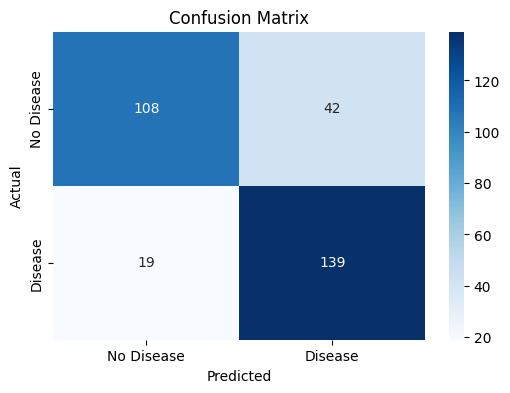


Sample Person's Data:
age          62.0
sex           0.0
cp            0.0
trestbps    138.0
chol        294.0
fbs           1.0
restecg       1.0
thalach     106.0
exang         0.0
oldpeak       1.9
slope         1.0
ca            3.0
thal          2.0
Name: 622, dtype: float64
Prediction: The person **does NOT have heart disease** (negative).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
heart_data = pd.read_csv("heart.csv")

# Splitting Features and Target
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

# Split Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

# Train SVM with fixed C
model_svm = SVC(C=1.0, kernel='linear')
model_svm.fit(X_train, Y_train)

# Evaluate on training data
X_train_prediction = model_svm.predict(X_train)
train_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Training Accuracy:', train_accuracy)

# Evaluate on test data
X_test_prediction = model_svm.predict(X_test)
test_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Test Accuracy:', test_accuracy)

# Confusion Matrix & Classification Report
cm = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix:")
print(cm)

report = classification_report(Y_test, X_test_prediction)
print("Classification Report:")
print(report)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predict on one individual (for example: first test sample)
sample = X_test.iloc[0]
prediction = model_svm.predict(sample.to_frame().T)

print("\nSample Person's Data:")
print(sample)
if prediction[0] == 1:
    print("Prediction: The person **has heart disease** (positive).")
else:
    print("Prediction: The person **does NOT have heart disease** (negative).")

